Sampling single mode initial states using methods presented in the article
- [Olsen, Bradley, Opt. Comm. 282 (2009) 3924-3929](https://doi.org/10.1016/j.optcom.2009.06.033); errata [Olsen, Lewis-Swan, Bradley, Opt. Comm. 370 (2016) 327-328](https://doi.org/10.1016/j.optcom.2016.02.068)

We also sample some new distributions:
- fock state for +W
- thermal state for +P

In [1]:
using PhaseSpaceTools, PyPlot

In [2]:
?coherent

search: coherent cohere



```
a,ā = coherent(β,N;dist="+P")
```

Sample the phase-space distribution for a coherent state.

`β`: coherent (complex) amplitude.

`N`: number of samples.

`dist`: phase-space distrubtion. Can be either `W` or `+P`.

For a coherent state in +P, the distribution is just a point on the complex plane at the position of the coherent amplitude.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


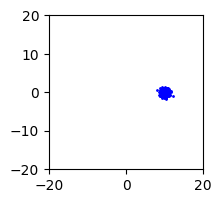

100.65085376233522 + 0.0im


In [3]:
b=10
N=1000
a,ā = coherent(b,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)

In [4]:
?thermal

search: thermal



```
a,ā = thermal(β,n̄,N;dist="P")
```

Sample the phase-space distribution for a thermal state.

`β`: coherent (complex) displacement.

`n̄`: thermal average population.

`N`: number of samples.

`dist`: phase-space distribution. Can be `P`, `Q` or `W`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


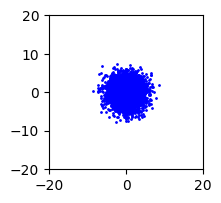

9.950993716983506 + 0.0im

In [5]:
a,ā = thermal(0,10,5000;dist="P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)

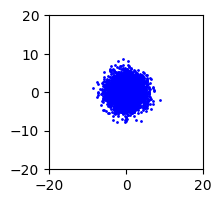

9.788357863156154 + 0.0im

In [6]:
a,ā = thermal(0,10,5000;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
mean(a.*ā)-.5

In [7]:
?squeezed

search: squeezed squeeze



```
a,ā = squeezed(β,ϵ,N;dist="+P")
```

Sample the phase-space distribution for a squeezed state.

`β`: coherent (complex) amplitude.

`ϵ`: complex valued squeezing parameter.

`N`: number of samples.

`dist`: phase-space distribution; can be `W` or `+P`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


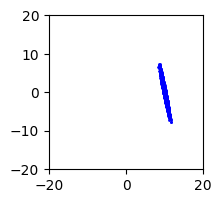

104.27775095773542 + 0.0im
104.53383099788888


In [8]:
β = 10
ϕ = π/16
r = 1.5
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N,dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(sinh(abs(ϵ)).^2+abs2(β))

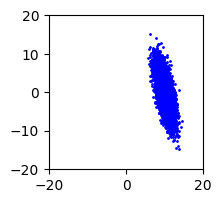

113.39206843383774
113.15411641800824


In [9]:
β = 10
ϕ = π/16
r = 2
ϵ = r*exp(2*im*ϕ)
N = 10000
a,ā = squeezed(β,ϵ,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(real(mean(a.*ā)))
println(sinh(abs(ϵ)).^2+abs2(β))

In [10]:
?fock

search: fock foreach UniformScaling functionloc @functionloc



```
a,ā = fock(n,N;dist="+P")
```

Sample the phase-space distribution for a Fock state.

`n`: number of the fock state |n⟩.

`N`: number of samples.

`dist`: phase-space distribution can be either `W`, `+W`, or `+P`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.

## Wigner representation

  * The standard `W` is sampled using an approximation that reproduces operator averages accuratley for large `n`, but neglects some quantum correlations.
  * The `+W` sampling is carried out in a doubled phase space, where the distribution is positive semi-definite, and hence may be sampled exactly for any `n`. Fast evaluation is achieved for large `n` using an accurate asymptotic expansion `(n>320)`.


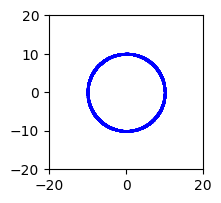

99.9932089855504 + 0.0im
100


In [11]:
n = 100
N = 10000
a,ā = fock(n,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(ā),s=.5,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
println(n)

  0.000956 seconds (112 allocations: 1.533 MiB)
n = 320
<â⁺â> = 

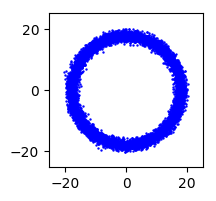

320.3267706875801 - 0.031232523339279im
V(n̂) = 4.121203398346552 + 9.855349821007096im


In [12]:
n = 320
N = 10000
@time a,ā = fock(n,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)
Vn= mean(ā.^2.*a.^2)+mean(ā.*a)-n̄.^2
println("<â⁺â> = ", n̄)
println("V(n̂) = ",Vn)

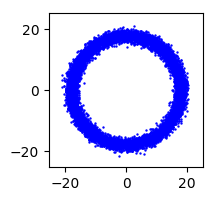

  0.148835 seconds (51 allocations: 1.778 MiB)
n = 320
<â⁺â> = 319.87714248543625 - 0.3979917298179553im
V(n̂) = -11.210762403497938 - 4.659462882556824im


In [14]:
n = 320
N = 10000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2.*a.^2)-mean(ā.*a)-n̄.^2
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)

  0.002102 seconds (51 allocations: 1.778 MiB)
n = 321
<â⁺â> = 

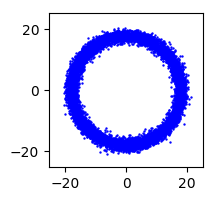

320.77843637930897 + 0.38242964499209003im
V(n̂) = -27.98830515964073 + 10.182383264761114im


In [16]:
#for n>320 uses asymptotic expansion
n=321
N=10000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2.*a.^2)-mean(ā.*a)-n̄.^2
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)

  0.332908 seconds (69 allocations: 161.590 MiB, 25.80% gc time)
n = 

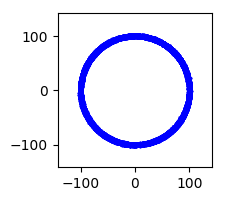

10000
<â⁺â> = 10000.066891586448 + 0.15092363041207643im
V(n̂) = -34.01266537606716 + 24.02096703662346im


In [17]:
#push n and N
n=10000
N=1000000
@time a,ā = fock(n,N,dist="+W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=.5,c="blue")
axis("square")
axis([-sqrt(2n),sqrt(2n),-sqrt(2n),sqrt(2n)])
println("n = ", n)
n̄ = mean(ā.*a)-.5
Vn= mean(ā.^2.*a.^2)-mean(ā.*a)-n̄.^2
println("<â⁺â> = ",n̄)
println("V(n̂) = ",Vn)

In [18]:
?crescent

search: crescent



```
a,ā = crescent(β,ϵ,q,N;dist="+P")
```

Sample the phase-space distribution for a crescent state. First samples a squeezed state, then introduces a searing factor in phase-space in the form of a gaussian distributed random phase.

`β` is coherent (complex) amplitude.

`ϵ`: squeezing paramter.

`q`: shearing parameter.

`N`: number of samples.

`dist`: phase-space distribution. Can be `+P`,`Q` or `W`.

For standard `P,Q,W` distributions, `a` and `ā` are complex conjugate, while for `+P` etc, `a` and `ā` are independent variables.


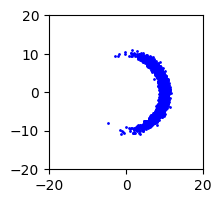

99.81253221172793 + 0.0im
100.0


In [19]:
β = 10
ϵ = 0
q = .5
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="W")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-.5)
#not quite the right moments for crescent state, but a sanity check of sorts:
println(sinh(abs(ϵ)).^2+abs2(β)) 

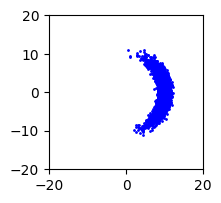

100.03816355970193 + 0.0im
100.0


In [20]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="Q")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā)-1)
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts

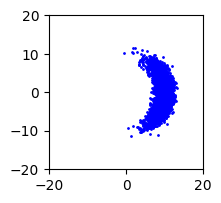

99.87803459230695 + 0.2652055601562838im
100.0


In [21]:
β = 10
ϵ = 0
q = .4
N = 5000
a,ā = crescent(β,ϵ,q,N;dist="+P")
figure(figsize=(2,2))
scatter(real(a),imag(a),s=1,c="blue")
axis("square")
axis([-20,20,-20,20]);
println(mean(a.*ā))
println(sinh(abs(ϵ)).^2+abs2(β)) #not quite the right moments for crescent state, but a check of sorts